# Hypothesis Testing

In hypothesis testing, we can use the z-distribution when the population standard deviation is known. But in most cases, we need to approximate it using sample standard deviation, hence need to use the t-distribution. The t-distribution has fatter tails than the normal distribution, however it will become like the z-distribution when the degree of freedom $(n-1)$ is very large.0,1)

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
# add a new feature - logreturn for microsoft stocks
ms = pd.read_csv('data/microsoft.csv')
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

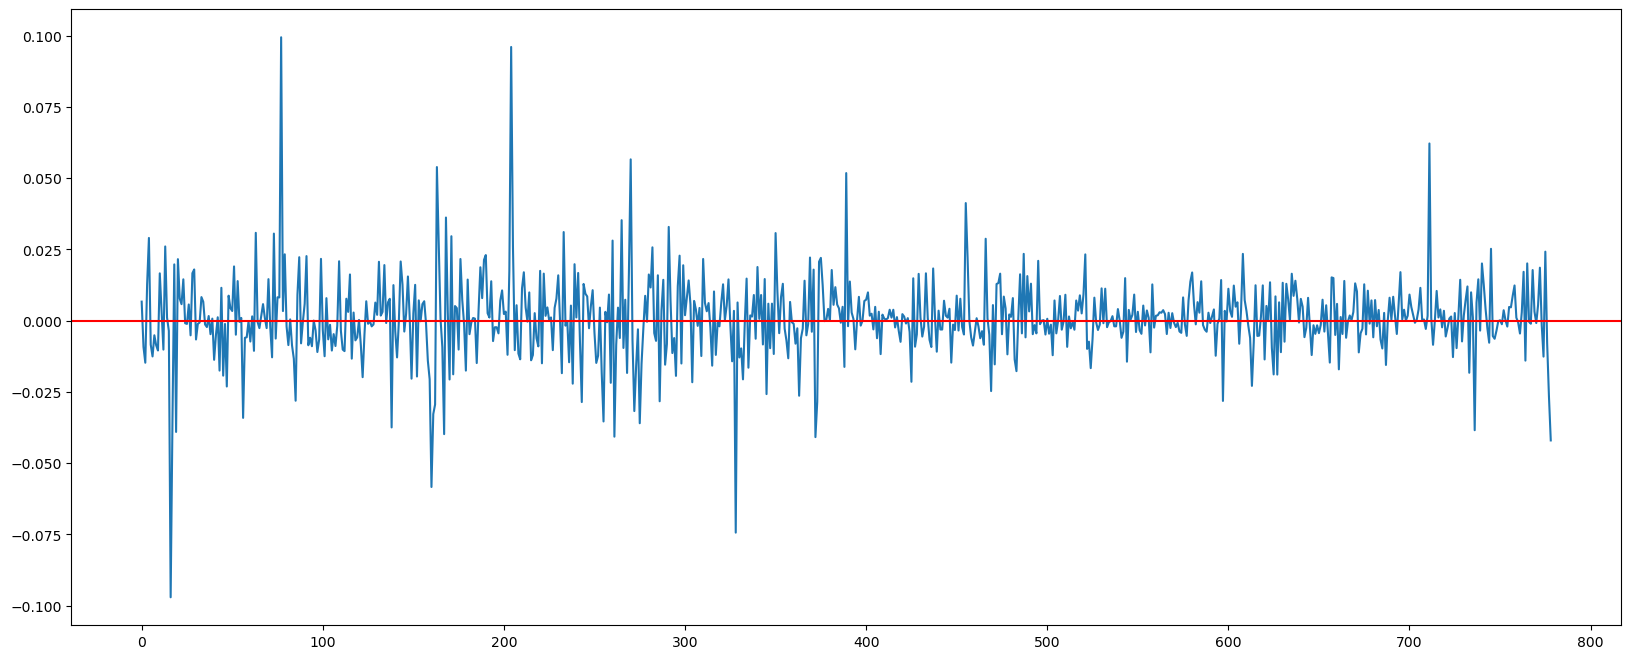

In [5]:
# because log return goes up and down, further analysis is needed to check if it will yield positive or negative profit
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

To test if the profit will be greater than zero, we can use a one-tailed test.

- $H_0 : \mu \leq 0$ - 
$H_a : \mu > 0$

In [7]:
# calculate sample statistics
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.6141477140003675


In [8]:
# now we compute the z-value for which we reject the null
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


In [10]:
# shall we reject the null?
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


# P-value calculation

- $Ha: mu \neq 0$: two tail test with  `p_value=2 * (1-norm.cdf(np.abs(z), 0, 1))`
- $Ha: mu>0$: upper tail test with `p_value=1-norm.cdf(z,0,1)`
- $Ha:mu<0$: lower tail test with `p_value=norm.cdf(z,0,1)`

In [11]:
# we can also get the p-value of our sample statistic
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694996968464


In [12]:
# we reject if the probability is less than alpha
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False
